In [1]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import non_negative_tucker, non_negative_parafac 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#!pip install git+https://github.com/ahwillia/tensortools

In [3]:
#!pip install tensorly

In [6]:
data = np.load('example_data.npy')

In [7]:
trajectory = []

dt = 0.1

xt = [0]
yt = [30]
v0x = 20
v0y = 20


x = xt[0]
y = yt[0]
cum_t = 0
count = 0
while (y > 0) or (count == 0):
    if count != 0:
        xt.append(x)
        yt.append(y)
    
    cum_t += dt
    x = np.round(v0x*cum_t + xt[0], 5)
    y = np.round(v0y*cum_t + yt[0] - 0.5*9.8*cum_t**2, 5)
    count += 1

In [8]:
xbins = 10
x_step = np.ceil(np.max(xt) / xbins) 
x_bins = np.arange(x_step, (x_step) * xbins + x_step, x_step)
#x_bins = np.linspace(np.min(xt), np.max(xt), xbins)

In [9]:
ybins = 15
y_step = np.ceil(np.max(yt) / ybins)
y_bins = np.arange(y_step, (y_step) * ybins + y_step, y_step)

In [10]:
len(x_bins)

10

In [11]:
tensor = []
for c in range(count):
    tmp = [[0 for __ in y_bins] for _ in x_bins]
    x_dig = np.digitize(xt[c], x_bins, right=True)
    y_dig = np.digitize(yt[c], y_bins, right=True)
    #print(x_dig, y_dig)
    tmp[x_dig][y_dig] = 1.0
    tensor.append(tmp)
#tensor = np.asarray(tensor)

In [12]:
for t in tensor:
    #print(t)
    pass

Text(0, 0.5, 'Y(t)')

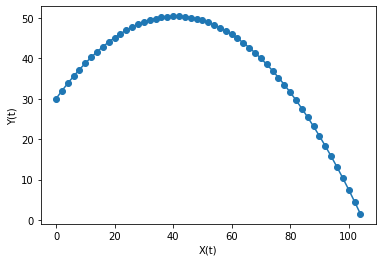

In [13]:
plt.plot(xt, yt, '-o')
plt.xlabel('X(t)')
plt.ylabel('Y(t)')

Text(0, 0.5, 'X(t)')

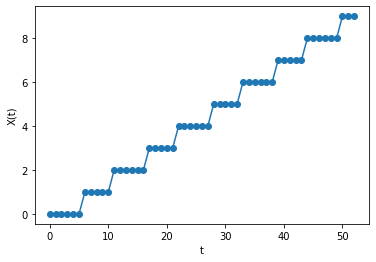

In [14]:
plt.plot(range(len(xt)), [np.digitize(x, x_bins) for x in xt], '-o')
plt.xlabel('t')
plt.ylabel('X(t)')

Text(0, 0.5, 'Y(t)')

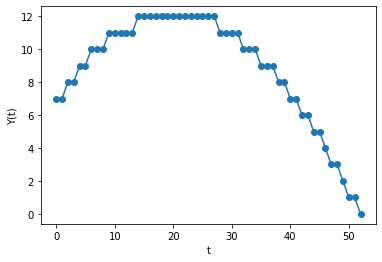

In [15]:
plt.plot(range(len(yt)), [np.digitize(y, y_bins) for y in yt], '-o')
plt.xlabel('t')
plt.ylabel('Y(t)')

Text(0, 0.5, 'Y(t)')

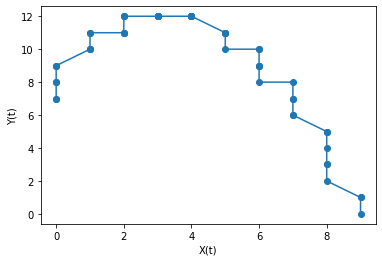

In [16]:
plt.plot([np.digitize(x, x_bins) for x in xt], [np.digitize(y, y_bins) for y in yt], '-o')
plt.xlabel('X(t)')
plt.ylabel('Y(t)')

# Tensor Factorization

In [17]:
tl_tensor = tl.tensor(tensor)

In [18]:
def plot_factors(factors, d=3, factor_labels = ["Time", "Features", "Time"]):
    assert d == len(factor_labels), "The lenght of factor_labels must match d"
    rank = factors[0].shape[1]
    fig, axes = plt.subplots(rank, d, figsize=(8, int(rank * 1.2 + 1)))
    factors_name = factor_labels
    if rank > 1:
        for ind, (factor, axs) in enumerate(zip(factors[:d], axes.T)):
            axs[-1].set_xlabel(factors_name[ind])
            for i, (f, ax) in enumerate(zip(factor.T, axs)):
                sns.despine(top=True, ax=ax)
                ax.bar(range(len(f)),f)
                axes[i, 0].set_ylabel("Factor " + str(i+1))
    else:
        for ind, factor, in enumerate(factors[:d]):
            ax = axes[ind]
            ax.set_xlabel(factors_name[ind])
            for i, f in enumerate(factor.T):
                sns.despine(top=True, ax=ax)
                ax.bar(range(len(f)),f)
                ax.set_ylabel("Factor " + str(i+1))
    fig.tight_layout()

In [19]:
r = 3

In [20]:
cp_tf = non_negative_parafac(tl_tensor,
                             r,
                             normalize_factors=False
                            )

In [21]:
tucker_tf = non_negative_tucker(tl_tensor,
                                [r, r, r, r]
                               )

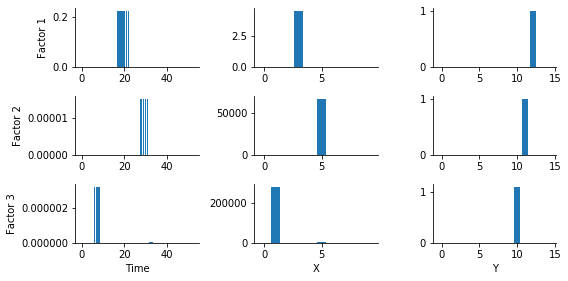

In [22]:
plot_factors(cp_tf.factors,
             d=3,
             factor_labels=['Time', 'X', 'Y']
            )

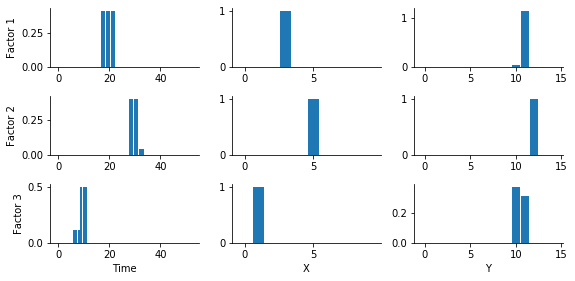

In [23]:
plot_factors(tucker_tf.factors,
             d=3,
             factor_labels=['Time', 'X', 'Y'])